# RAJASTHAN

In [512]:
import pandas as pd

# Load the datasets for Rajasthan
df_rj_enrolment = pd.read_csv('/content/Rajasthan Enrolment State.csv')
df_rj_demographic = pd.read_csv('/content/Rajasthan Demographic State.csv')
df_rj_biometric = pd.read_csv('/content/Rajasthan Biometric State.csv')

print("Rajasthan Enrolment Dataset:")
print(df_rj_enrolment.head())
print(df_rj_enrolment.info())
print(df_rj_enrolment.describe())

print("\nRajasthan Demographic Dataset:")
print(df_rj_demographic.head())
print(df_rj_demographic.info())
print(df_rj_demographic.describe())

print("\nRajasthan Biometric Dataset:")
print(df_rj_biometric.head())
print(df_rj_biometric.info())
print(df_rj_biometric.describe())

Rajasthan Enrolment Dataset:
         date      state   district  pincode  age_0_5  age_5_17  \
0  01-04-2025  Rajasthan      Jalor   343049       54        27   
1  01-04-2025  Rajasthan    Jodhpur   342301      210       101   
2  01-05-2025  Rajasthan     Sirohi   307026      246       301   
3  01-05-2025  Rajasthan    Bikaner   334001      421       164   
4  01-06-2025  Rajasthan  Jaisalmer   345028       46        74   

   age_18_greater  
0              14  
1              12  
2              10  
3              20  
4              14  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67523 entries, 0 to 67522
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            67523 non-null  object
 1   state           67523 non-null  object
 2   district        67523 non-null  object
 3   pincode         67523 non-null  int64 
 4   age_0_5         67523 non-null  int64 
 5   age_5_17        67523 non-n

In [513]:
# Convert 'date' column to datetime objects
df_rj_enrolment['date'] = pd.to_datetime(df_rj_enrolment['date'], format='%d-%m-%Y')
df_rj_demographic['date'] = pd.to_datetime(df_rj_demographic['date'], format='%d-%m-%Y')
df_rj_biometric['date'] = pd.to_datetime(df_rj_biometric['date'], format='%d-%m-%Y')

print("Data types after conversion for df_enrolment:")
print(df_rj_enrolment.info())
print("\nData types after conversion for df_demographic:")
print(df_rj_demographic.info())
print("\nData types after conversion for df_biometric:")
print(df_rj_biometric.info())

Data types after conversion for df_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67523 entries, 0 to 67522
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            67523 non-null  datetime64[ns]
 1   state           67523 non-null  object        
 2   district        67523 non-null  object        
 3   pincode         67523 non-null  int64         
 4   age_0_5         67523 non-null  int64         
 5   age_5_17        67523 non-null  int64         
 6   age_18_greater  67523 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 3.6+ MB
None

Data types after conversion for df_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105878 entries, 0 to 105877
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           105878 non-null  date

In [514]:
merged_df_rj_temp = pd.merge(df_rj_enrolment, df_rj_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_rj_merged = pd.merge(merged_df_rj_temp, df_rj_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numeric columns
numeric_cols = df_rj_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numeric columns with 0
df_rj_merged[numeric_cols] = df_rj_merged[numeric_cols].fillna(0)

print("Merged DataFrame (df_merged) head:")
print(df_rj_merged.head())
print("\nMerged DataFrame (df_merged) info:")
print(df_rj_merged.info())

print("Shape of df_merged:", df_rj_merged.shape)
print("\nInfo of df_rj_merged:")
df_rj_merged.info()
print("\nDescription of df_rj_merged:")
print(df_rj_merged.describe())

df_rj = df_rj_merged[df_rj_merged['state'] == 'Rajasthan'].copy()
df_rj['year'] = df_rj['date'].dt.year
df_rj['month'] = df_rj['date'].dt.month

print("Shape of df_rj:", df_rj.shape)
print("\nFirst 5 rows of df_rj with new 'year' and 'month' columns:")
print(df_rj.head())

Merged DataFrame (df_merged) head:
        date      state district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Rajasthan    Ajmer   305001      0.0       0.0             0.0   
1 2025-03-01  Rajasthan    Ajmer   305002      0.0       0.0             0.0   
2 2025-03-01  Rajasthan    Ajmer   305003      0.0       0.0             0.0   
3 2025-03-01  Rajasthan    Ajmer   305004      0.0       0.0             0.0   
4 2025-03-01  Rajasthan    Ajmer   305005      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0          355.0        3046.0           0.0          0.0  
1           17.0         131.0          26.0         36.0  
2           20.0         228.0           0.0          0.0  
3           23.0         279.0           0.0          0.0  
4           14.0         123.0           0.0          0.0  

Merged DataFrame (df_merged) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282085 entries, 0 to 282084
Data colum

In [515]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_rj_agg = df_rj.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated DataFrame (df_rj_agg) head:")
print(df_rj_agg.head())
print("\nAggregated DataFrame (df_rj_agg) info:")
print(df_rj_agg.info())

Aggregated DataFrame (df_rj_agg) head:
   year  month      state  district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Rajasthan     Ajmer      0.0       0.0             0.0   
1  2025      3  Rajasthan     Alwar      0.0       0.0             0.0   
2  2025      3  Rajasthan  Banswara      0.0       0.0             0.0   
3  2025      3  Rajasthan     Baran      0.0       0.0             0.0   
4  2025      3  Rajasthan    Barmer      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0         2506.0       34149.0        3525.0       4057.0  
1         3115.0       42792.0        8748.0      10602.0  
2         1323.0       58693.0        3148.0       5719.0  
3         1466.0       27755.0        3503.0       4849.0  
4         1996.0       38294.0        6426.0       7221.0  

Aggregated DataFrame (df_rj_agg) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 11 columns):
 #   Column

In [516]:
import numpy as np

# 1. Create 'totalenrolments' column
df_rj_agg['totalenrolments'] = df_rj_agg['age_0_5'] + df_rj_agg['age_5_17'] + df_rj_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_rj_agg['childenrolments'] = df_rj_agg['age_0_5'] + df_rj_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_rj_agg['totaldemoupdates'] = df_rj_agg['demo_age_5_17'] + df_rj_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_rj_agg['totalbioupdates'] = df_rj_agg['bio_age_5_17'] + df_rj_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_rj_agg['CES'] = np.where(
    df_rj_agg['totalenrolments'] == 0,
    0,
    df_rj_agg['childenrolments'] / df_rj_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_rj_agg['DUR'] = np.where(
    df_rj_agg['totalenrolments'] == 0,
    0,
    df_rj_agg['totaldemoupdates'] / df_rj_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_rj_agg['BUR'] = np.where(
    df_rj_agg['totalenrolments'] == 0,
    0,
    df_rj_agg['totalbioupdates'] / df_rj_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_rj_agg) with new metrics head:")
print(df_rj_agg.head())

Aggregated DataFrame (df_rj_agg) with new metrics head:
   year  month      state  district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Rajasthan     Ajmer      0.0       0.0             0.0   
1  2025      3  Rajasthan     Alwar      0.0       0.0             0.0   
2  2025      3  Rajasthan  Banswara      0.0       0.0             0.0   
3  2025      3  Rajasthan     Baran      0.0       0.0             0.0   
4  2025      3  Rajasthan    Barmer      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0         2506.0       34149.0        3525.0       4057.0              0.0   
1         3115.0       42792.0        8748.0      10602.0              0.0   
2         1323.0       58693.0        3148.0       5719.0              0.0   
3         1466.0       27755.0        3503.0       4849.0              0.0   
4         1996.0       38294.0        6426.0       7221.0              0.0   

   childenrolments  totaldemou

In [517]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_rj_agg['Enorm'] = df_rj_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_rj_agg['Dnorm'] = df_rj_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year' and 'state'
df_rj_agg['Bnorm'] = df_rj_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_rj_agg['stdnorm'] = (df_rj_agg['Enorm'] + df_rj_agg['Dnorm'] + df_rj_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_rj_agg['ALBI'] = 1 - df_rj_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_rj_agg['ALBI'] = df_rj_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_rj_agg) with normalized metrics and ALBI head:")
print(df_rj_agg.head())

Aggregated DataFrame (df_rj_agg) with normalized metrics and ALBI head:
   year  month      state  district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Rajasthan     Ajmer      0.0       0.0             0.0   
1  2025      3  Rajasthan     Alwar      0.0       0.0             0.0   
2  2025      3  Rajasthan  Banswara      0.0       0.0             0.0   
3  2025      3  Rajasthan     Baran      0.0       0.0             0.0   
4  2025      3  Rajasthan    Barmer      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0         2506.0       34149.0        3525.0  ...           36655.0   
1         3115.0       42792.0        8748.0  ...           45907.0   
2         1323.0       58693.0        3148.0  ...           60016.0   
3         1466.0       27755.0        3503.0  ...           29221.0   
4         1996.0       38294.0        6426.0  ...           40290.0   

   totalbioupdates  CES  DUR  BUR  Enorm     Dnorm     B

In [518]:
df_rj_agg['Enormrisk'] = 1 - df_rj_agg['Enorm']
df_rj_agg['CESrisknorm'] = 1 - df_rj_agg['CES']
df_rj_agg['DURrisknorm'] = 1 - df_rj_agg['DUR']
df_rj_agg['BURrisknorm'] = 1 - df_rj_agg['BUR']
df_rj_agg['ALBIrisknorm'] = 1 - df_rj_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_rj_agg['riskscore'] = (
    df_rj_agg['Enormrisk'] +
    df_rj_agg['CESrisknorm'] +
    df_rj_agg['DURrisknorm'] +
    df_rj_agg['BURrisknorm'] +
    df_rj_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_rj_agg) with risk components and riskscore head:")
print(df_rj_agg.head())

Aggregated DataFrame (df_rj_agg) with risk components and riskscore head:
   year  month      state  district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Rajasthan     Ajmer      0.0       0.0             0.0   
1  2025      3  Rajasthan     Alwar      0.0       0.0             0.0   
2  2025      3  Rajasthan  Banswara      0.0       0.0             0.0   
3  2025      3  Rajasthan     Baran      0.0       0.0             0.0   
4  2025      3  Rajasthan    Barmer      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0         2506.0       34149.0        3525.0  ...  0.563143  0.096450   
1         3115.0       42792.0        8748.0  ...  0.705285  0.246170   
2         1323.0       58693.0        3148.0  ...  0.922046  0.112799   
3         1466.0       27755.0        3503.0  ...  0.448932  0.106247   
4         1996.0       38294.0        6426.0  ...  0.618989  0.173613   

    stdnorm      ALBI  Enormrisk  CESriskn

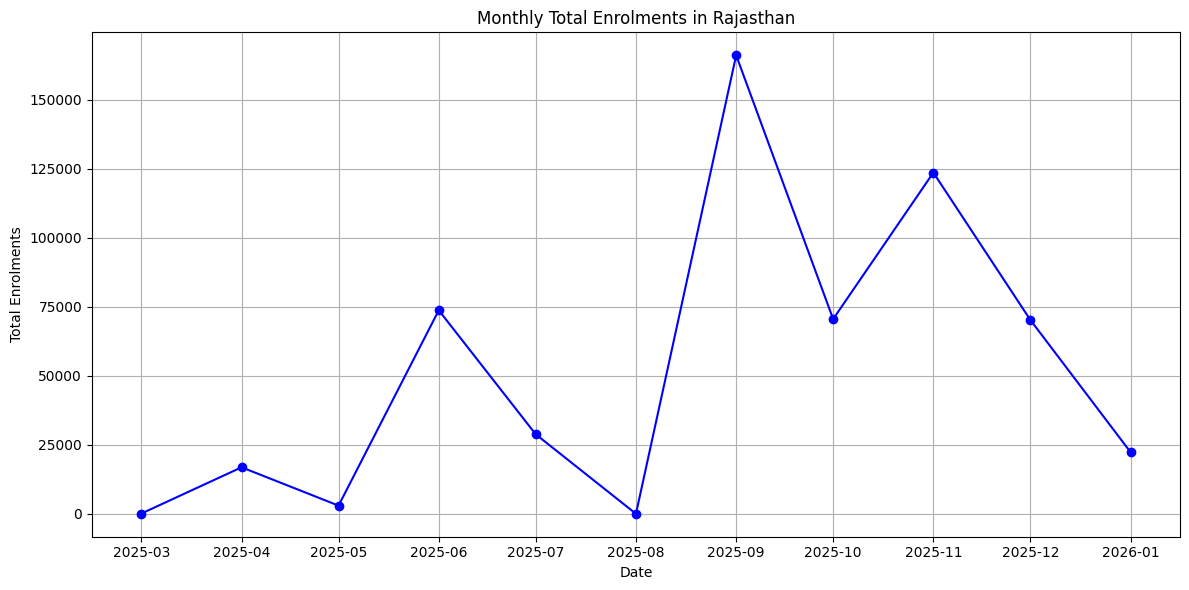

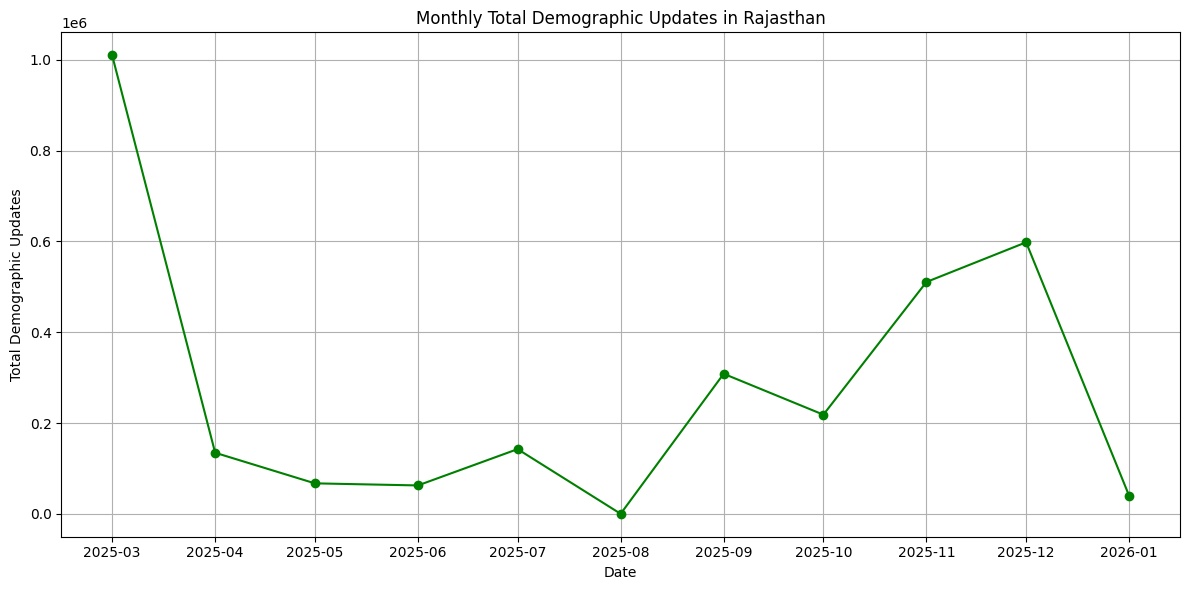

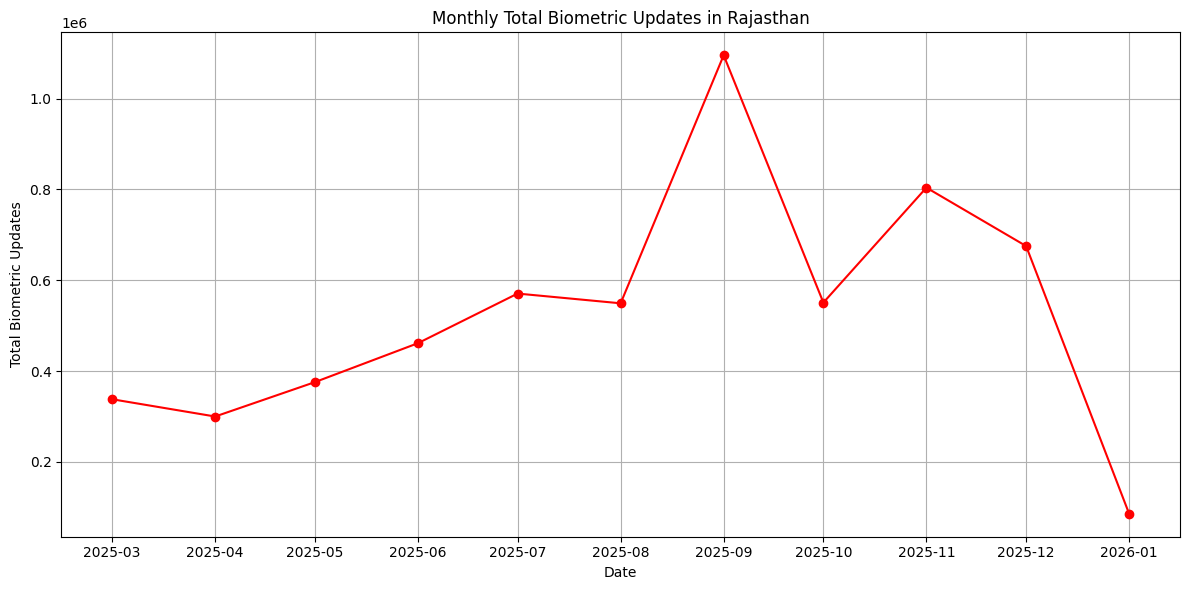

Monthly trend plots generated successfully.


In [519]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'riskscore'
df_monthly_trends = df_rj_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_monthly_trends['date'] = pd.to_datetime(df_monthly_trends['year'].astype(str) + '-' + df_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_monthly_trends = df_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Rajasthan')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Rajasthan')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Rajasthan')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

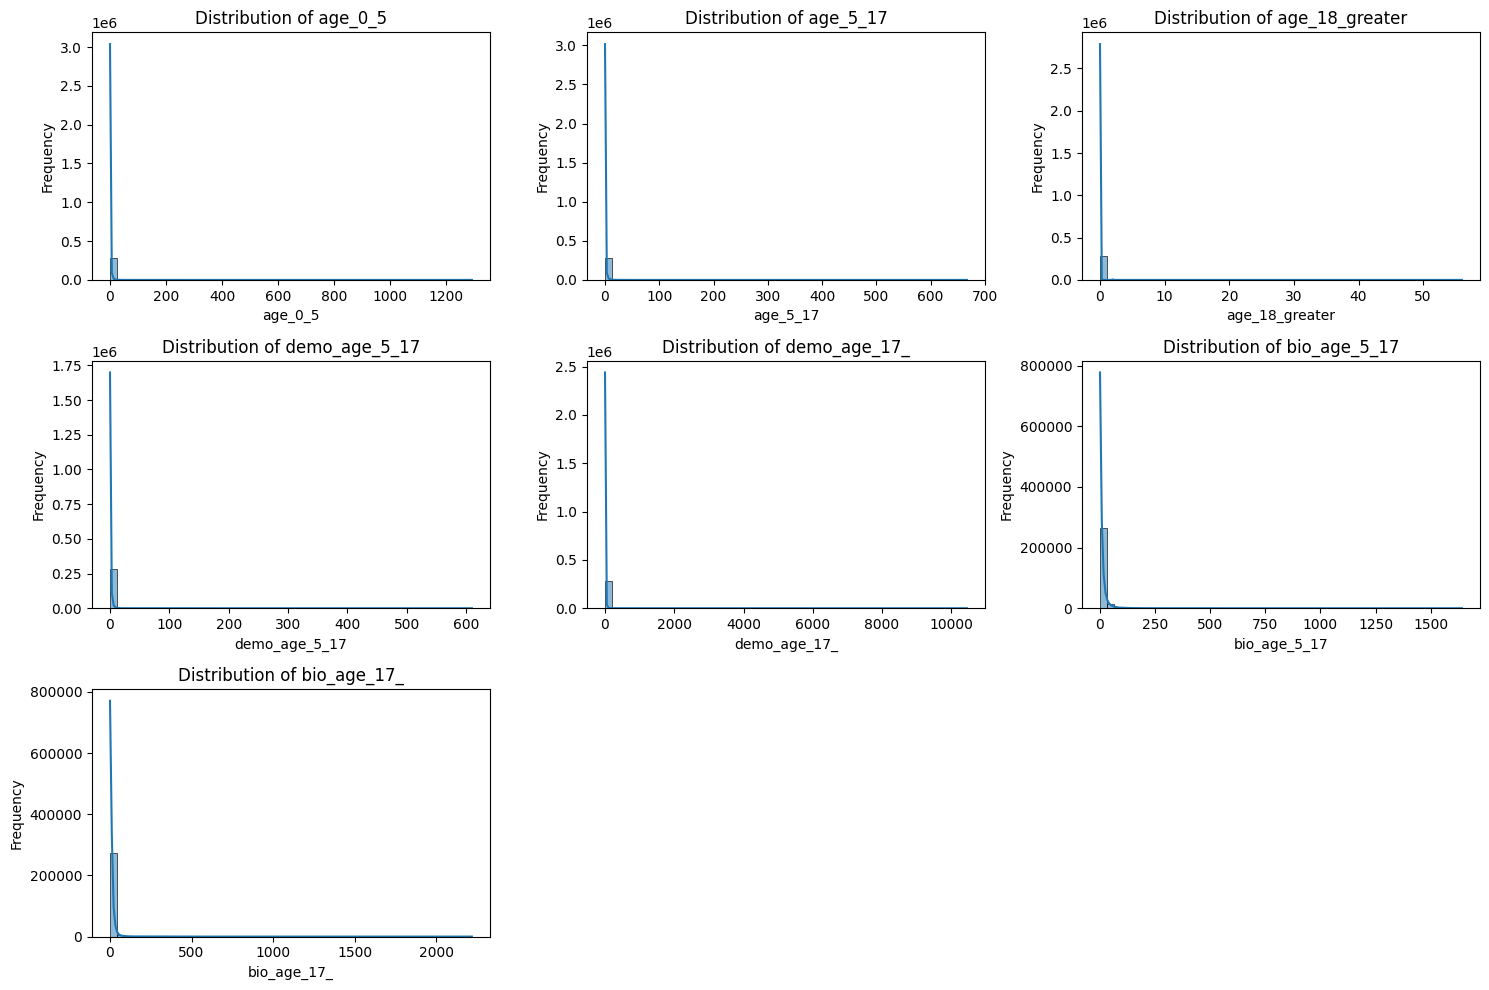

Histograms for numerical columns displayed.


In [520]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_rj_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms for numerical columns displayed.")

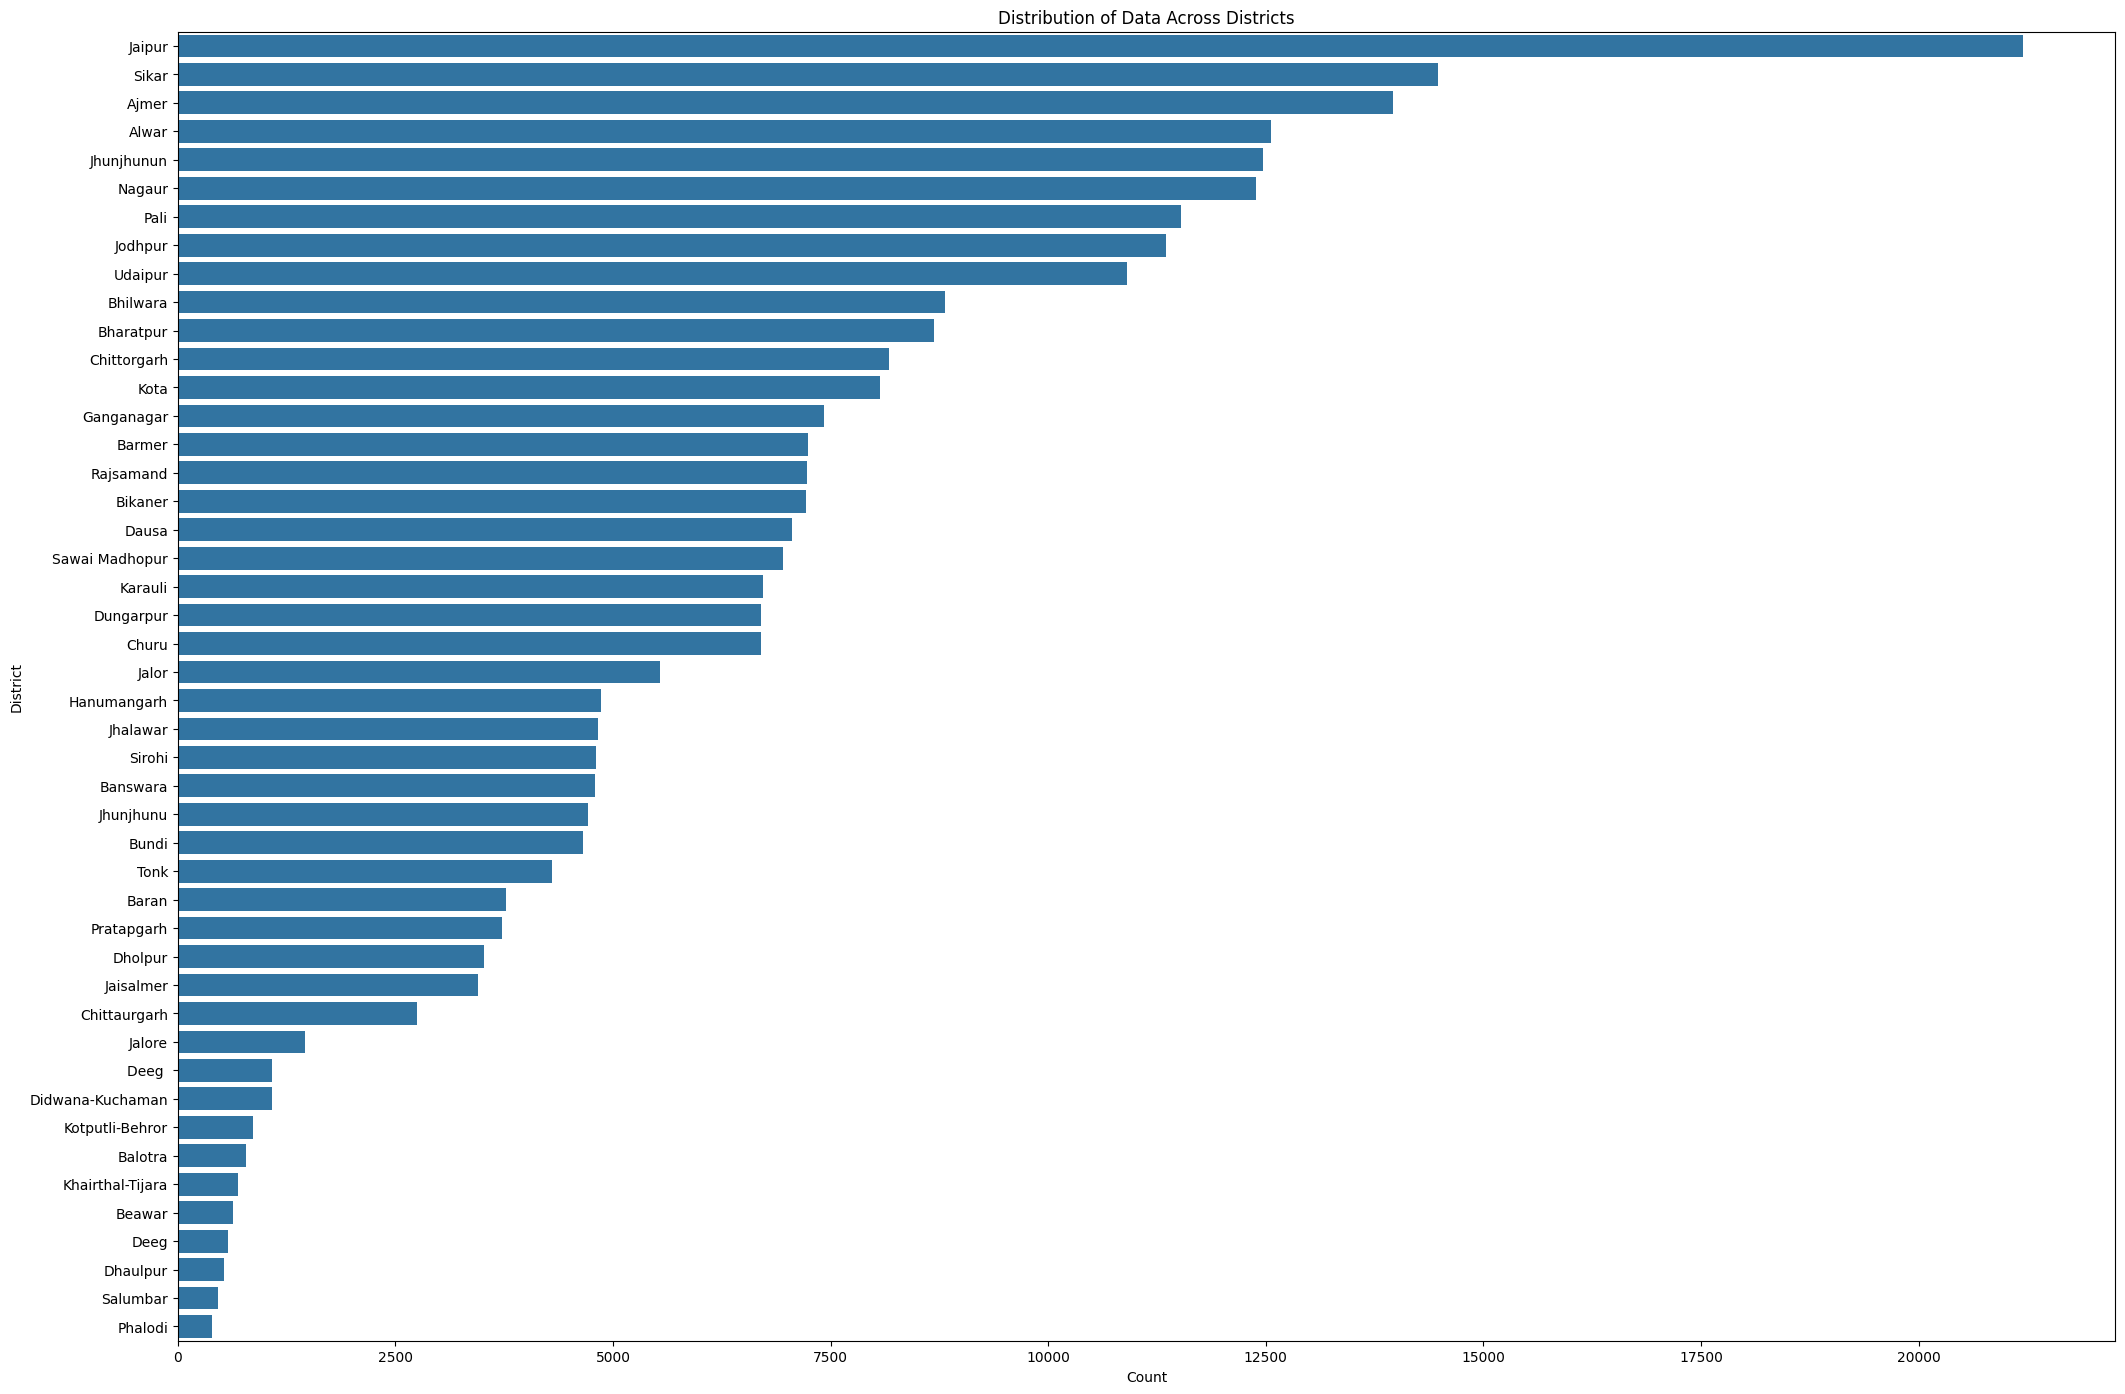

Count plot for 'district' displayed.


In [521]:
import seaborn as sns
plt.figure(figsize=(25, 17))
sns.countplot(data=df_rj_merged, y='district', order=df_rj_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Count plot for 'district' displayed.")

**Bivariate and Trivarite Analysis**

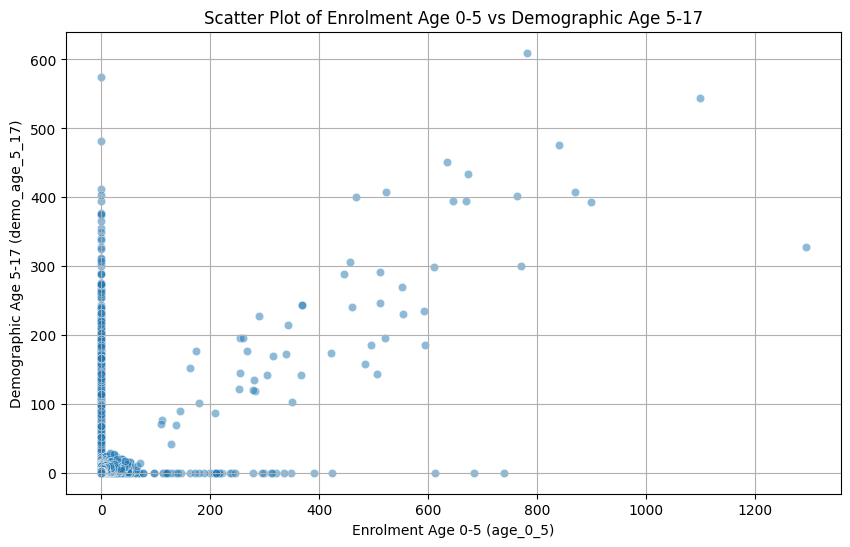

Insight: There appears to be a weak positive correlation between 'age_0_5' and 'demo_age_5_17', though many data points are clustered at the lower ends of both variables.


In [522]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_rj_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Insight: There appears to be a weak positive correlation between 'age_0_5' and 'demo_age_5_17', though many data points are clustered at the lower ends of both variables.")

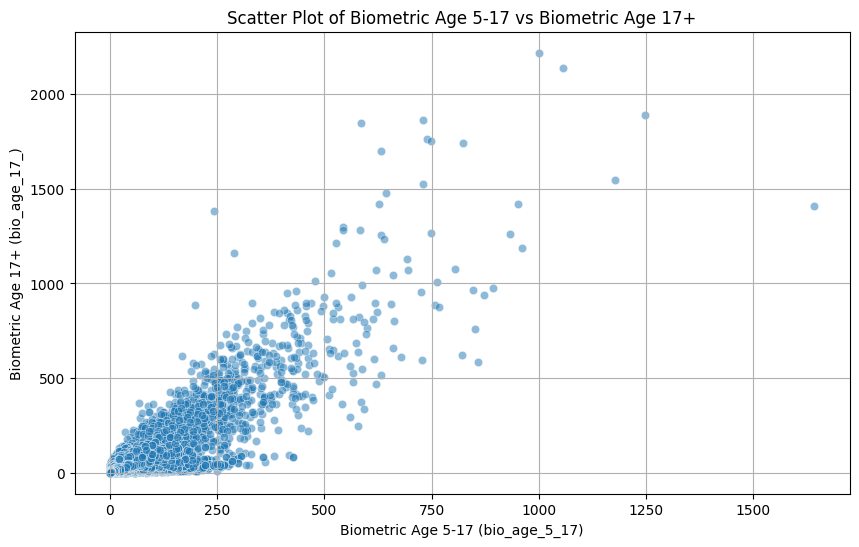

Insight: The scatter plot reveals a positive correlation between 'bio_age_5_17' and 'bio_age_17_', indicating that higher biometric counts in one age group often correspond to higher counts in the other.


In [523]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_rj_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Insight: The scatter plot reveals a positive correlation between 'bio_age_5_17' and 'bio_age_17_', indicating that higher biometric counts in one age group often correspond to higher counts in the other.")

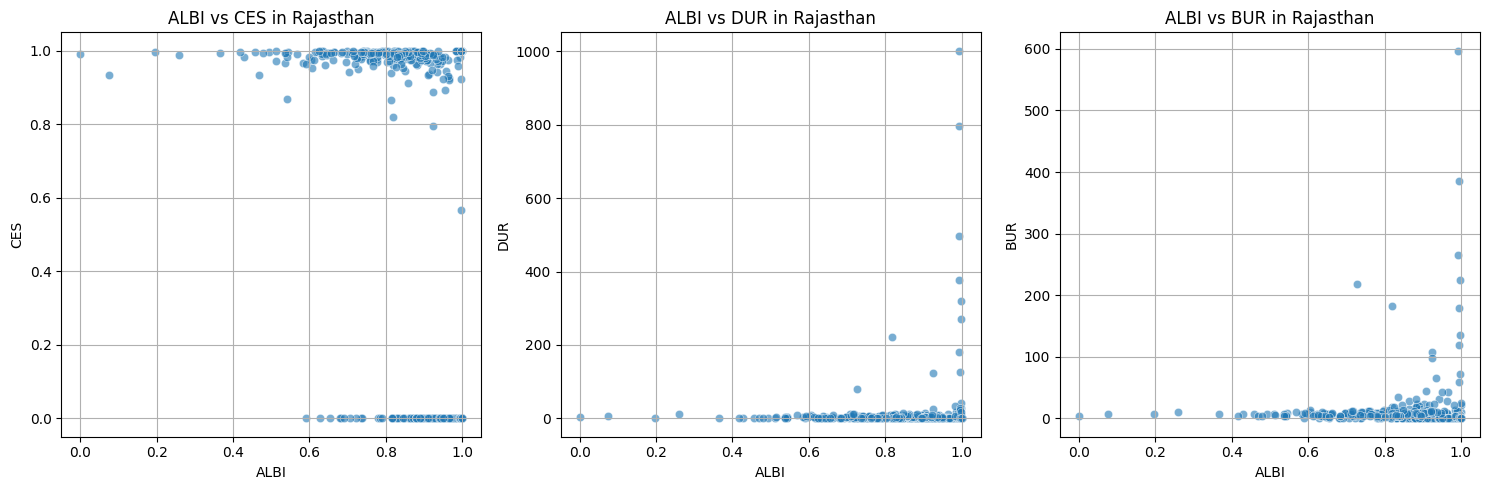

In [524]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_rj_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Rajasthan')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

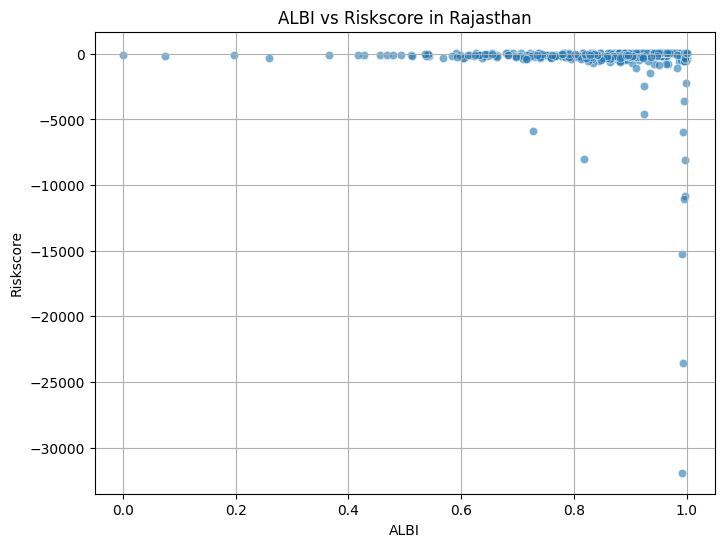

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Rajasthan.


In [525]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_rj_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Rajasthan')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Rajasthan.")

Correlation Matrix:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.857565        0.498822       0.406712   
age_5_17        0.857565  1.000000        0.478865       0.329749   
age_18_greater  0.498822  0.478865        1.000000       0.201788   
demo_age_5_17   0.406712  0.329749        0.201788       1.000000   
demo_age_17_    0.263217  0.205296        0.138980       0.821477   
bio_age_5_17    0.160454  0.127141        0.089370       0.416718   
bio_age_17_     0.146147  0.109670        0.124726       0.480915   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.263217      0.160454     0.146147  
age_5_17            0.205296      0.127141     0.109670  
age_18_greater      0.138980      0.089370     0.124726  
demo_age_5_17       0.821477      0.416718     0.480915  
demo_age_17_        1.000000      0.436884     0.516119  
bio_age_5_17        0.436884      1.000000     0.816108  
bio_age_17_         0

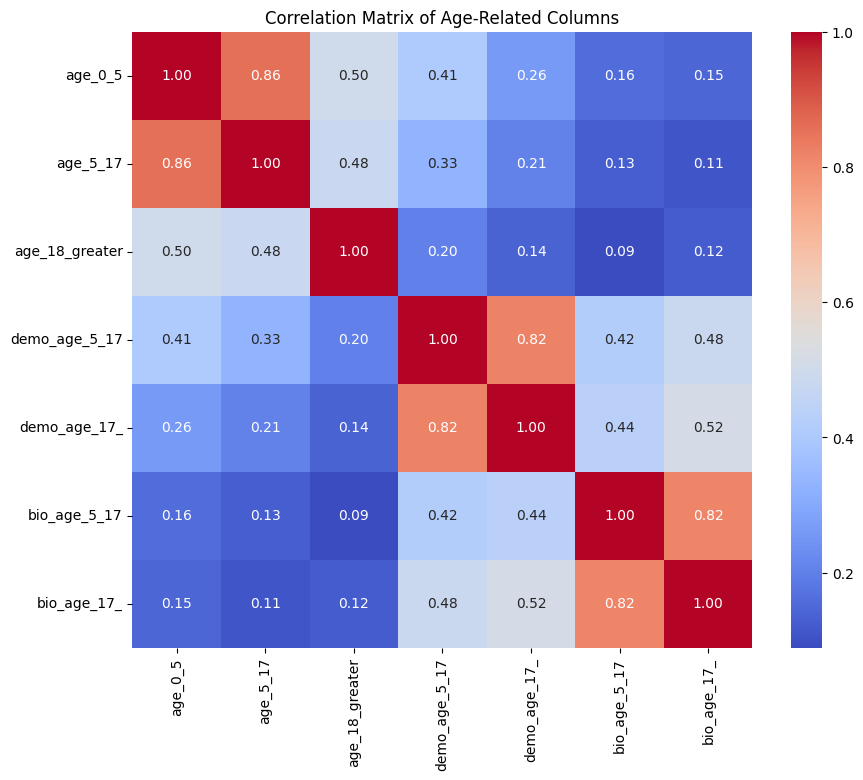

Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.


In [526]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix = df_rj_merged[numerical_age_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns')
plt.show()

print("Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.")

In [527]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_district_mean = df_rj_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data:")
print(df_district_mean.head())
print(df_district_mean.info())

District-wise average age-related data:
   district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0     Ajmer  1.042395  0.349685        0.017474       0.896591      8.558150   
1     Alwar  1.888889  0.956193        0.040701       1.211310     10.985504   
2   Balotra  0.001284  0.001284        0.000000       0.084724      1.201540   
3  Banswara  1.459307  1.151085        0.015651       1.323664     25.368948   
4     Baran  1.848806  0.751989        0.035809       1.550133     17.901857   

   bio_age_5_17  bio_age_17_  
0      7.707247     6.797121  
1     13.714536    11.712624  
2      0.066752     0.978177  
3     15.429466    12.797788  
4     14.545093    16.206897  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        46 non-null     object 
 1   age_0_5         46 non-null     float64
 2   age_5_

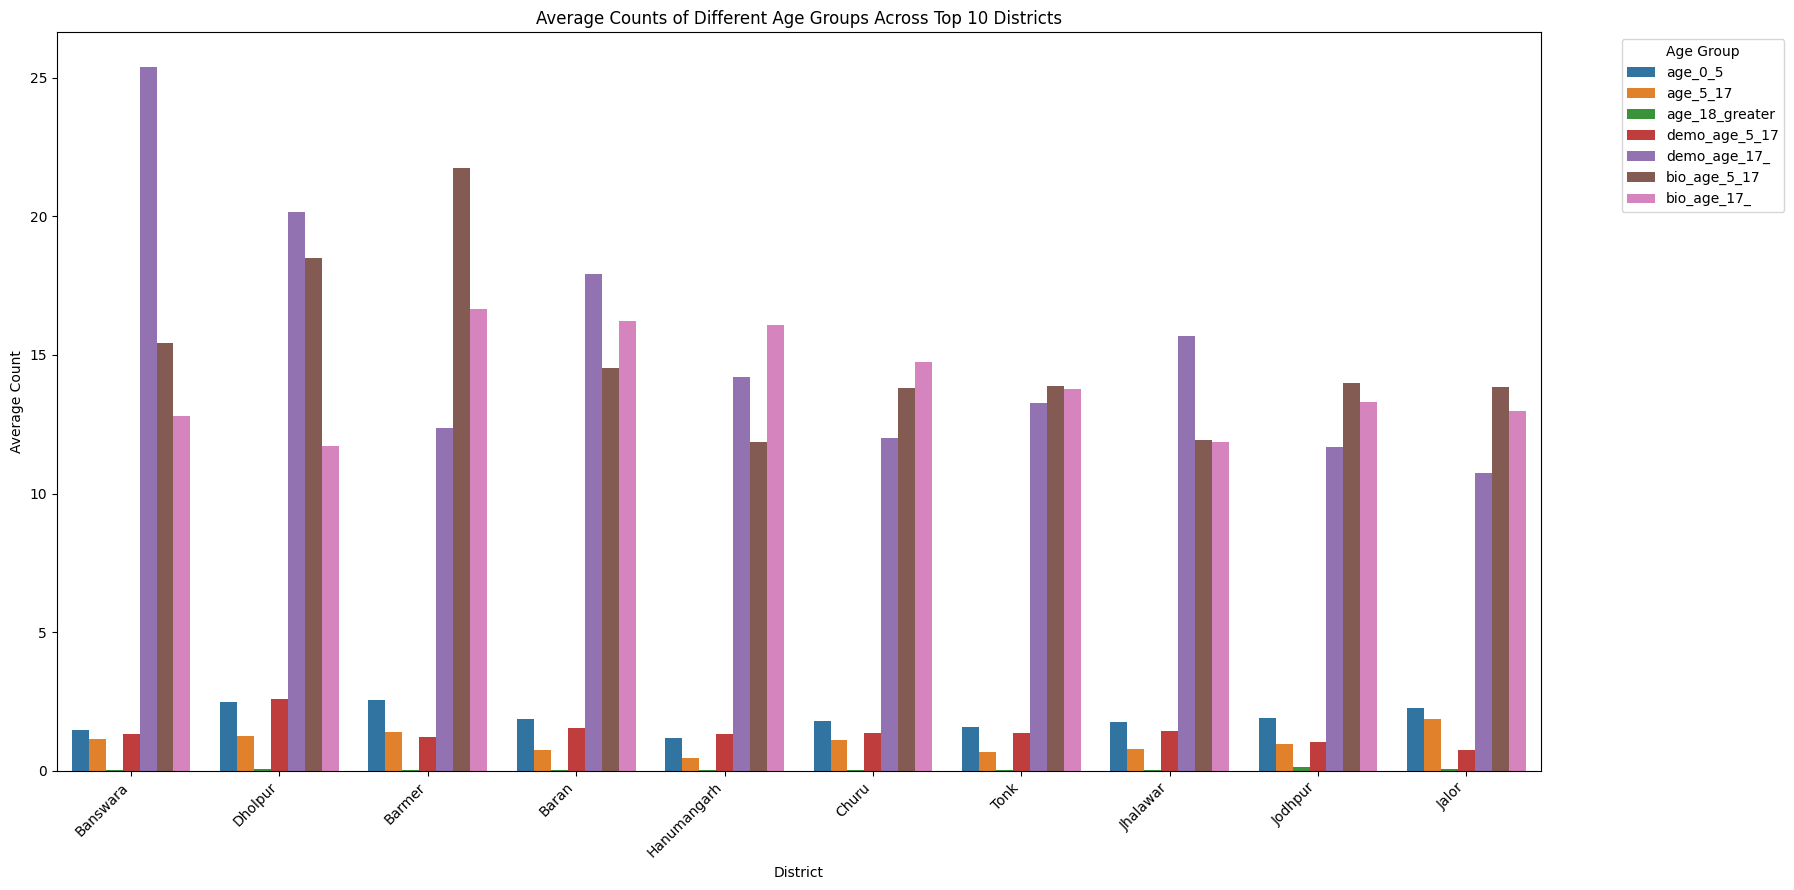

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [528]:
df_district_mean['total_avg_age'] = df_district_mean[age_cols_to_group].sum(axis=1)
df_district_mean_top10 = df_district_mean.nlargest(10, 'total_avg_age')

df_district_mean_melted = df_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date):
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0        56494.0      953742.0   
1 2025-03-09     41.0      36.0            17.0            0.0           0.0   
2 2025-04-01  11907.0    4141.0           794.0        15390.0      119076.0   
3 2025-05-01   1992.0     904.0            65.0         6289.0       60798.0   
4 2025-05-20      0.0       0.0             0.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0      135161.0     202814.0  
1           0.0          0.0  
2      116161.0     183780.0  
3      100937.0     155699.0  
4        4379.0       7876.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            232 non-null    datetime64[ns]
 1   a

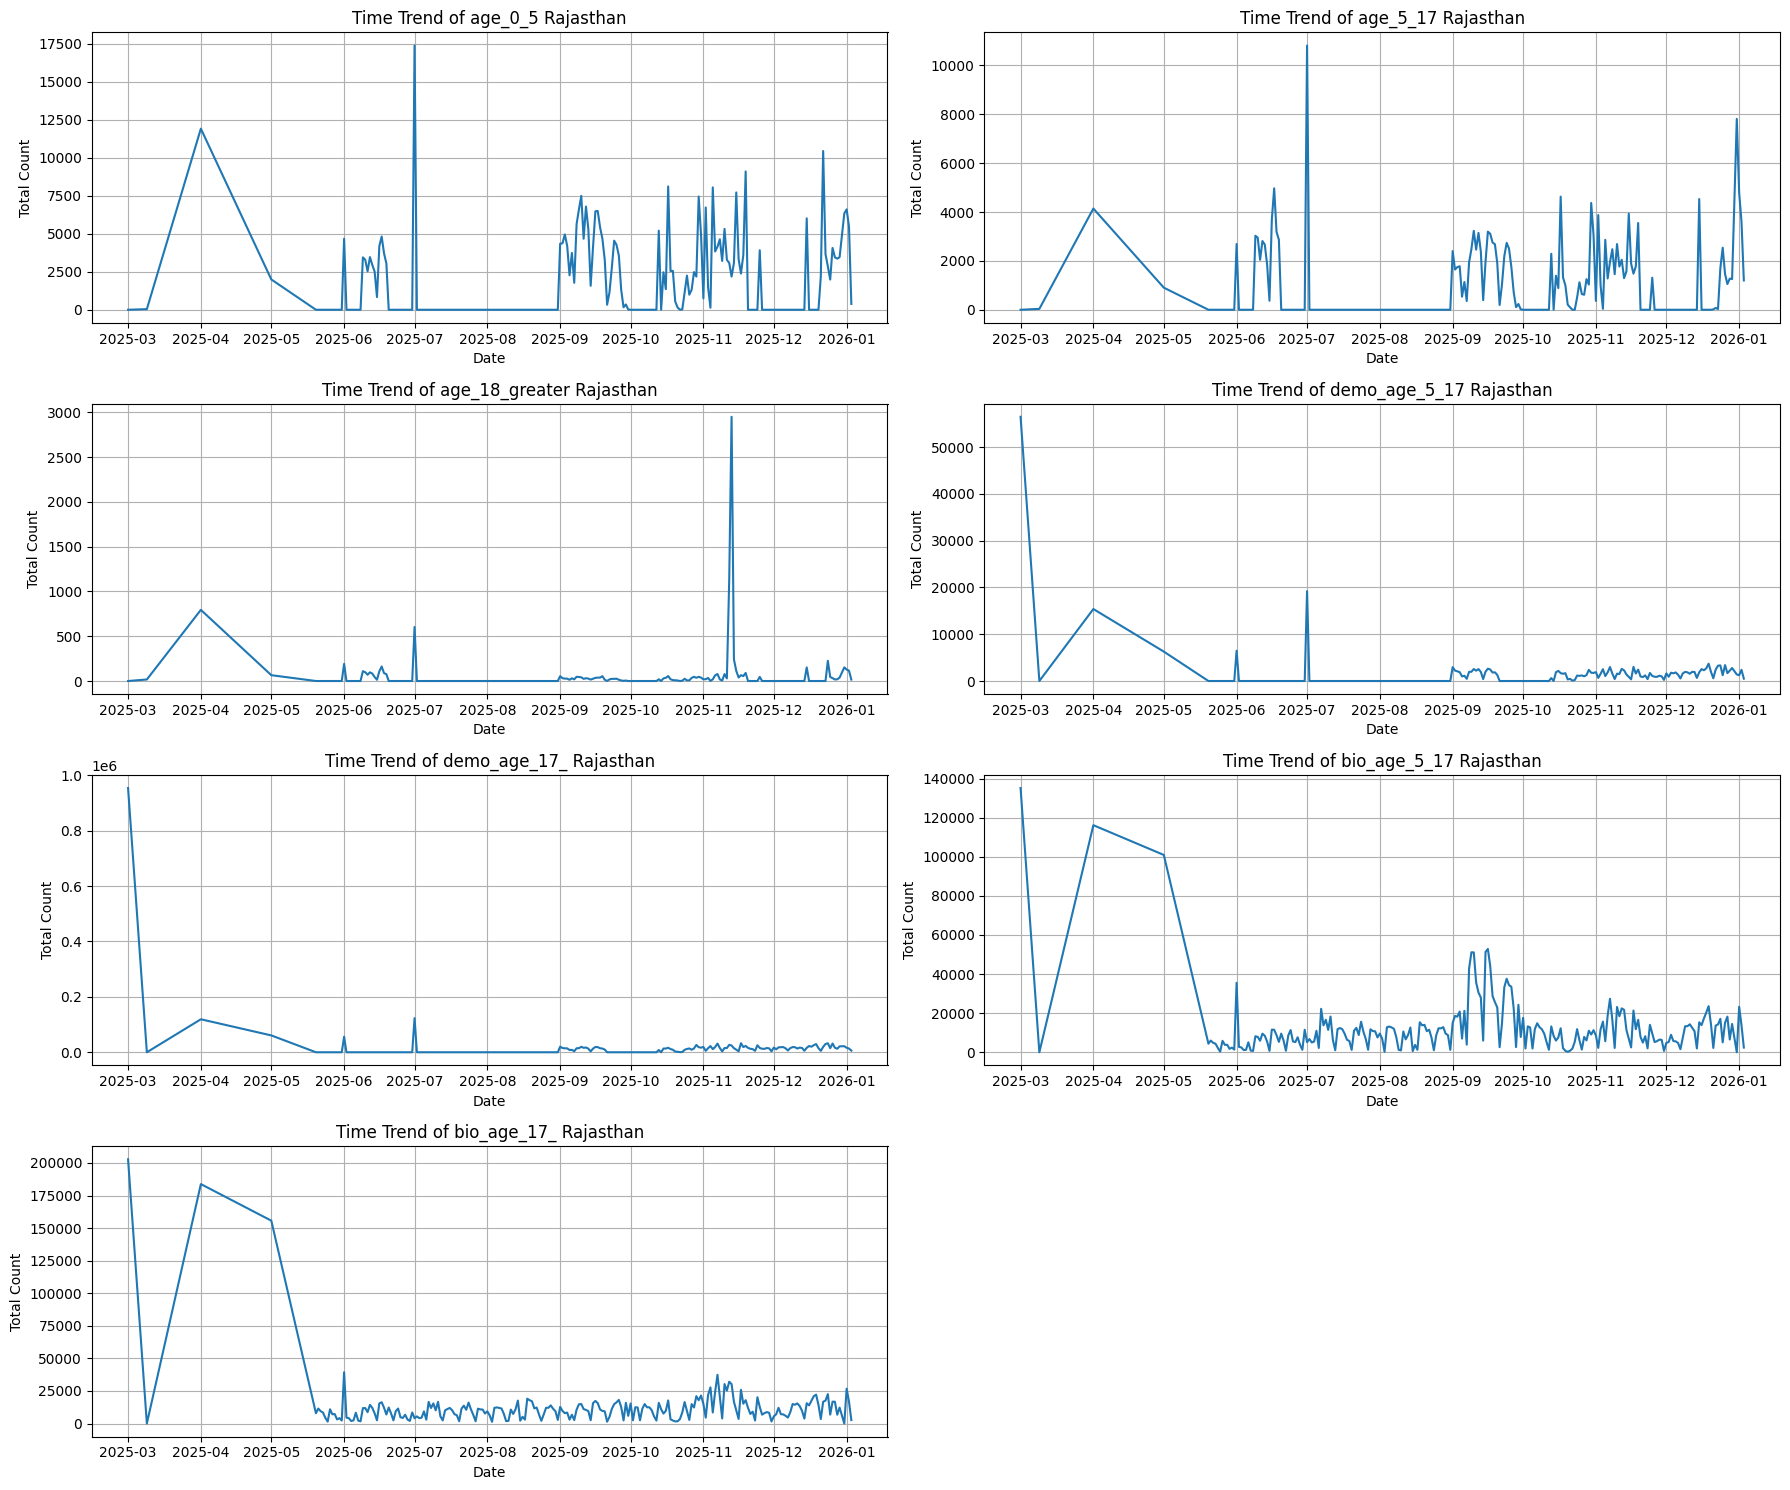

Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [533]:
df_rj_time_trend = df_rj_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date):")
print(df_rj_time_trend.head())
print(df_rj_time_trend.info())
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_rj_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} Rajasthan')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

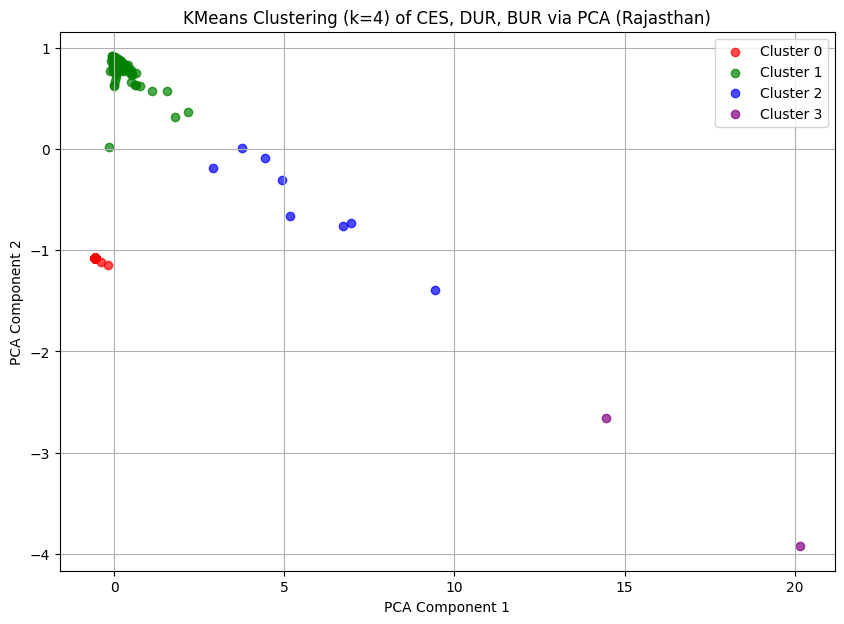

First 5 rows of df_rj_agg with 'clusterlabel' column:
   year  month      state  district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Rajasthan     Ajmer      0.0       0.0             0.0   
1  2025      3  Rajasthan     Alwar      0.0       0.0             0.0   
2  2025      3  Rajasthan  Banswara      0.0       0.0             0.0   
3  2025      3  Rajasthan     Baran      0.0       0.0             0.0   
4  2025      3  Rajasthan    Barmer      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0         2506.0       34149.0        3525.0  ...  0.096450  0.219865   
1         3115.0       42792.0        8748.0  ...  0.246170  0.317152   
2         1323.0       58693.0        3148.0  ...  0.112799  0.344948   
3         1466.0       27755.0        3503.0  ...  0.106247  0.185060   
4         1996.0       38294.0        6426.0  ...  0.173613  0.264201   

       ALBI  Enormrisk  CESrisknorm  DURrisknorm  BURrisknorm 

In [530]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_rj_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_rj_agg
df_rj_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_rj_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Rajasthan)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_rj_agg with 'clusterlabel' column:")
print(df_rj_agg.head())

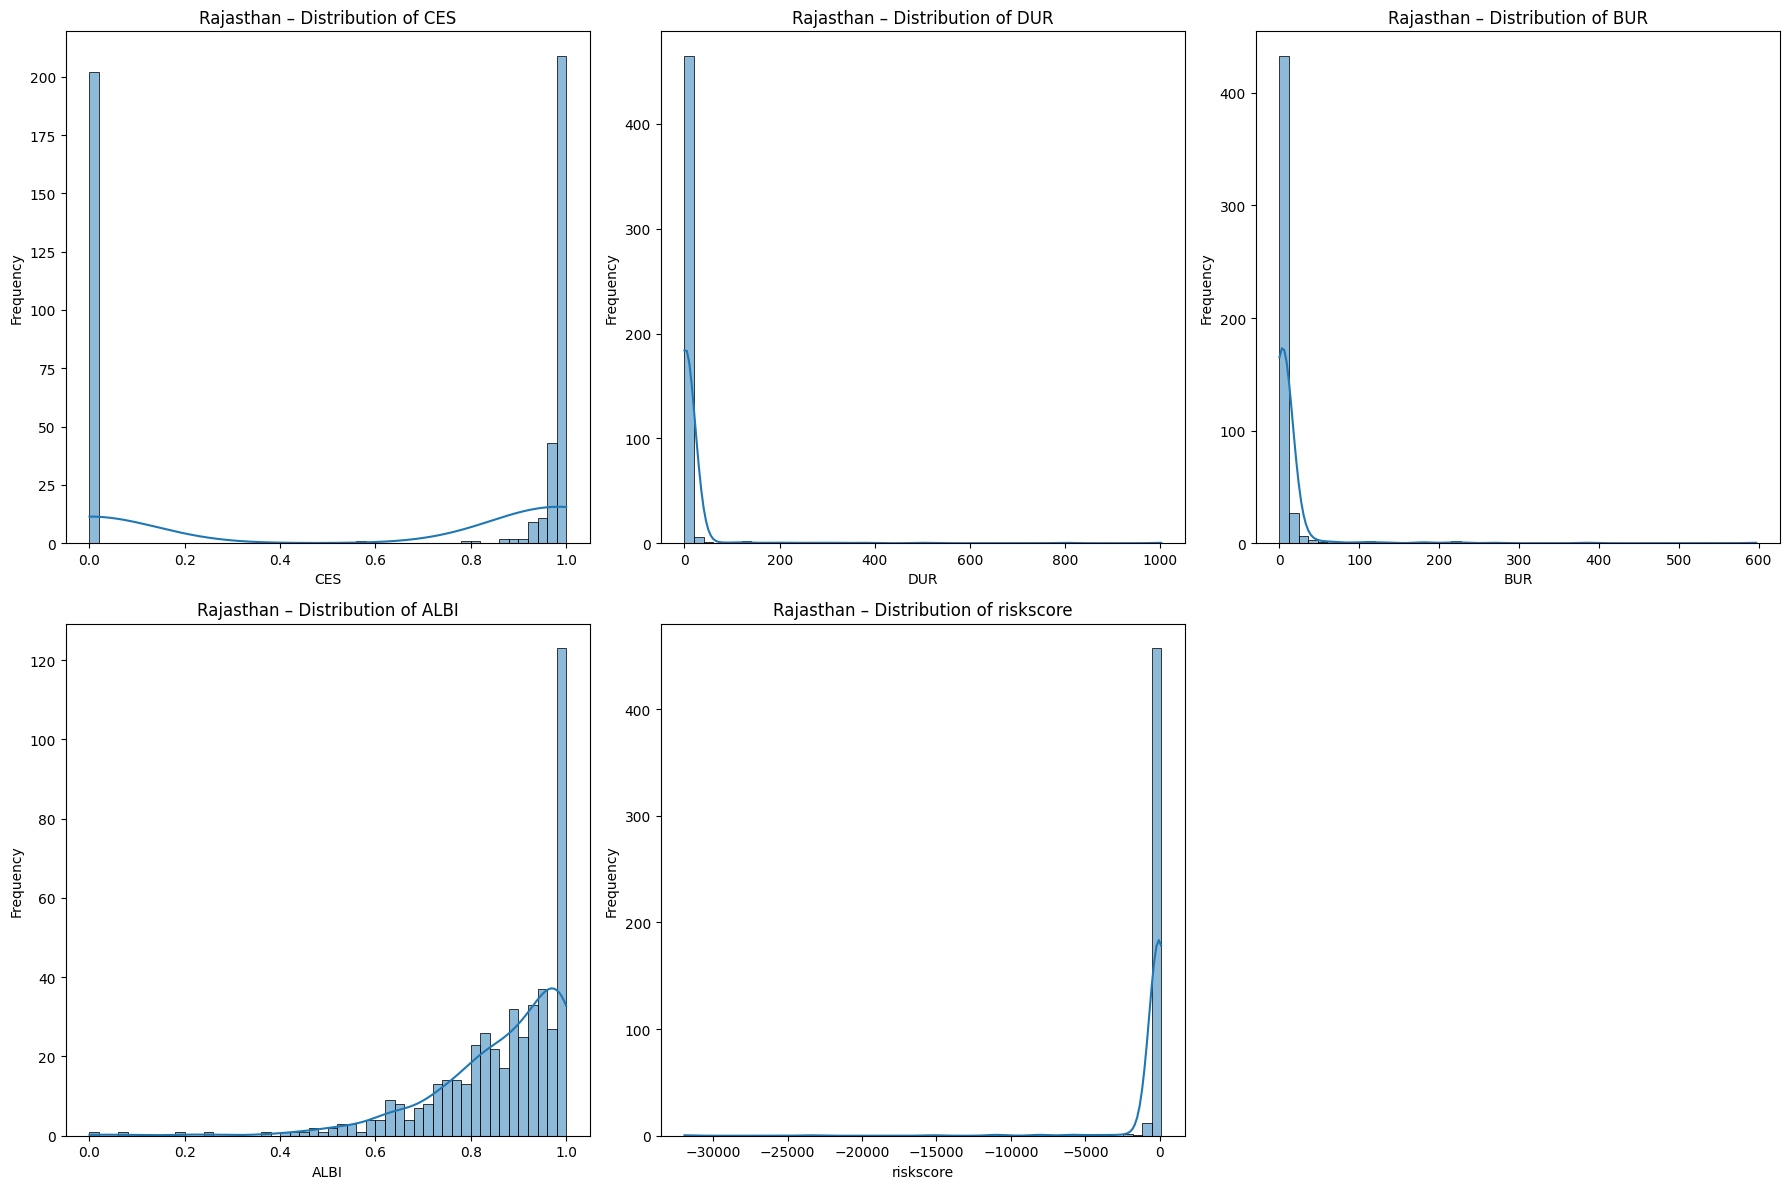

Rajasthan histograms for CES, DUR, BUR, ALBI, and riskscore displayed.


In [531]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_rj_agg[metric], bins=50, kde=True)
    plt.title(f'Rajasthan – Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Rajasthan histograms for CES, DUR, BUR, ALBI, and riskscore displayed.")


In [532]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_rj_agg['year'].max()
latest_month = df_rj_agg[df_rj_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_rj_agg for the latest year and month
df_latest_month = df_rj_agg[(df_rj_agg['year'] == latest_year) & (df_rj_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
        district      CES
         Balotra 1.000000
          Jalore 1.000000
       Jhunjhunu 1.000000
Didwana-Kuchaman 1.000000
           Deeg  1.000000
        Dhaulpur 1.000000
 Kotputli-Behror 1.000000
      Pratapgarh 1.000000
           Sikar 0.998645
       Dungarpur 0.996234

Bottom 10 Districts by CES (Year 2026, Month 1):
        district      CES
          Beawar 0.000000
        Salumbar 0.000000
         Phalodi 0.000000
Khairthal-Tijara 0.000000
            Deeg 0.923077
         Jodhpur 0.934987
  Sawai Madhopur 0.955446
    Chittaurgarh 0.958333
       Rajsamand 0.962963
          Barmer 0.983621

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
        district       DUR
         Balotra 27.000000
Didwana-Kuchaman 27.000000
           Deeg  26.500000
          Jalore 21.500000
 Kotputli-Behror 17.500000
       Jhunjhunu  5.869565
    Chitt

##Summary (Rajasthan):

The Aadhaar lifecycle analysis for Rajasthan provides insights into the enrolment and update activities across its districts. The df_rj_agg dataset, aggregated by month and district, serves as the basis for evaluating key performance indicators.

####Key Observations:
Data Integration and Preprocessing: Initial datasets for enrolment, demographic updates, and biometric updates were loaded, their 'date' columns converted to datetime objects, and merged into a single df_rj_merged DataFrame. Missing numerical values resulting from the outer merge were imputed with 0.

Derived Metrics: Essential metrics such as totalenrolments, childenrolments, totaldemoupdates, and totalbioupdates were computed. From these, CES (Child Enrolment Score), DUR (Demographic Update Rate), and BUR (Biometric Update Rate) were calculated, with appropriate handling for division by zero.

Normalization and ALBI: Min-max normalization was applied to totalenrolments, totaldemoupdates, and totalbioupdates to create Enorm, Dnorm, and Bnorm. These normalized values were used to compute stdnorm and the ALBI (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1.

Risk Score: A riskscore was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Consistent with observations in other states, significant negative risk scores were noted for many districts, highlighting a persistent issue with the metric's definition or calculation that requires further investigation to ensure interpretability and actionability.

Monthly Trends: Time-series plots for total enrolments, demographic updates, and biometric updates revealed monthly fluctuations, indicating periods of varying activity levels or specific campaigns/reporting cycles.

Correlation Analysis: The correlation matrix for age-related columns revealed strong positive correlations within enrolment age groups (age_0_5 and age_5_17), and similarly within demographic (demo_age_5_17 and demo_age_17_) and biometric (bio_age_5_17 and bio_age_17_) update categories. Correlations between enrolment figures and update figures were generally weaker.

District Performance (Latest Reporting Period: Year 2026, Month 1):

CES (Child Enrolment Score): Several districts (Balotra, Jalore, Jhunjhunu, Didwana-Kuchaman, Deeg, Dhaulpur, Kotputli-Behror, Pratapgarh) achieved a perfect CES of 1.0, indicating all enrolments were child enrolments in the latest period. Conversely, Beawar, Salumbar, Phalodi, and Khairthal-Tijara reported a CES of 0.0, suggesting no child enrolments were recorded for these districts in the latest month.
DUR (Demographic Update Rate): Balotra (27.0), Didwana-Kuchaman (27.0), and Deeg (26.5) exhibited exceptionally high demographic update rates relative to enrolments, which warrants further investigation into data reporting or specific update drives. Beawar, Salumbar, Phalodi, and Khairthal-Tijara reported a DUR of 0.0.
BUR (Biometric Update Rate): Hanumangarh (6.73) and Jaisalmer (5.25) had the highest biometric update rates. Similar to DUR, several districts (Balotra, Beawar, Kotputli-Behror, Khairthal-Tijara, Salumbar, Phalodi) showed a BUR of 0.0.
ALBI (Aadhaar Lifecycle Balance Index): Salumbar (1.0), Phalodi (0.999), and Balotra (0.998) showed the best balance, close to 1. Jaipur (0.0) had the lowest ALBI, indicating a significant imbalance, followed by Alwar (0.417) and Jodhpur (0.468).
Risk Score: Khairthal-Tijara (80.09) and Beawar (80.03) showed the highest positive risk scores. However, a large number of districts, such as Deeg (-529.93) and Didwana-Kuchaman (-509.94), displayed very large negative risk scores, reinforcing the consistent issue with this metric across multiple states. This anomaly makes the metric uninterpretable as a direct risk indicator in its current form.
Clustering Analysis: KMeans clustering successfully grouped districts into distinct clusters based on their CES, DUR, and BUR metrics, visualized via PCA. This highlights different operational profiles and performance levels across Rajasthan's districts.

####Conclusion:
Rajasthan exhibits varied performance across its districts in Aadhaar lifecycle management. While some districts show strong activity and balance, others face challenges with enrolments and update rates, with several reporting zero activity in certain categories. The persistent issue with negative riskscore values across multiple states, including Rajasthan, is a critical concern that requires immediate attention and refinement of the metric's calculation to ensure accuracy and utility. Targeted interventions should focus on districts with low update rates, imbalanced ALBI values, and problematic risk scores to improve overall Aadhaar data quality and lifecycle management. The exceptionally high DUR values in some districts also warrant a closer look to confirm data validity.

